In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
# Load dataset
df = pd.read_csv("Forest_fire.csv")


In [8]:
# Display first few rows
print(df.head())

        Area  Oxygen  Temperature  Humidity  Fire Occurrence
0   Jharkand      40           45        20                1
1  Bangalore      50           30        10                1
2    Ecuador      10           20        70                0
3          a      60           45        70                1
4  Bangalore      30           48        10                1


In [9]:
# Check for null values
print(df.isnull().sum())

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64


In [12]:
# Features and target
X = df[['Oxygen', 'Temperature', 'Humidity']]
y = df['Fire Occurrence']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[6 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



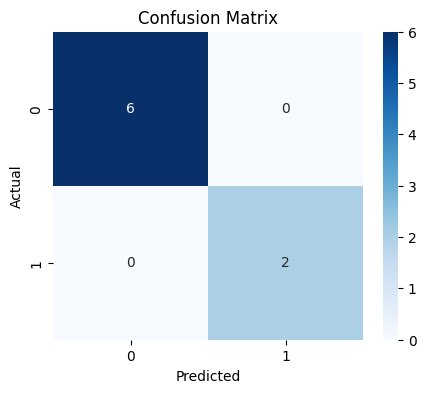

In [19]:
# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
# Feature Importance plot
importances = model.feature_importances_
feat_names = X.columns

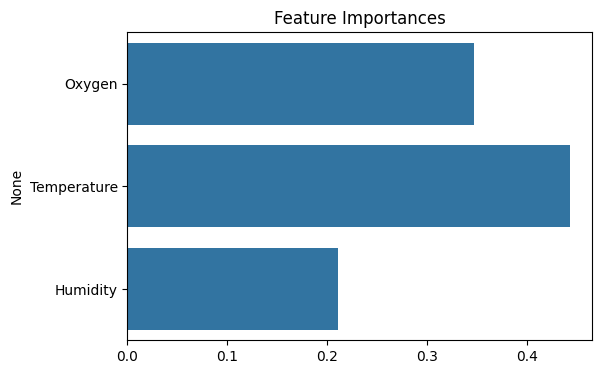

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()

In [22]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)